---
- title: "'CS61A: Lecture 33'"
- author: alex
- badges: true
- comments: true
- categories: [CS61A]
- date: 2024-11-25 1:00:00 -0800
- math: true
- tags: [CS61A, SQL]
---

# Aggregation
- So far, all SQL expressions have referred to values in a single row.
- Aggregation allows us to aggregate multiple rows together.
    - Aggregation can be used in everywhere, but mostly in columns.
- An aggregate function in the [columns] clause computes a value from a group of rows.
    - **Aggregation can only be applied over groups!**, or the entire table
- Ex: Get the kind of animal that has the greatest number of legs. 

In [ ]:
SELECT max(legs), kind FROM Animals

## Grouping Rows
- Rows in a table can be grouped, and aggregation is performed on each group.
- The number of groups is the number of unique values of an expression
- Ex: Get the max weight of each group of animals with a certai number of legs.

In [ ]:
SELECT legs, MAX(weight) FROM ANIMALS GROUP BY legs;

## Writing Select Statements
- We must describe the output table
    - Deterine which existing rows are needed to express the result (FROM & WHERE)
    - Form groups and determine which groups should appear as output rows (BROUGH BY & HAVING)
    - Format the output rows (SELECT)  
    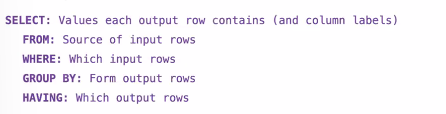
- GROUP BY allows us to have one output row per group.
- SELECT [] FROM [] WHERE [] GROUP BY [] HAVING 
- We may multiply the value of a SELECT statement by 1.0 to typecast it to a float.
- ROUND() allows us to round values
- Any aggregation functions that are used are only used within a group.
- We may also use string manipulation to find all entries that includes a certain string in a certain column
    - `INSTR([column], [string])` gets the index at which the string appears in the column. 0 if string is not found, SQL uses 1-based indexing.
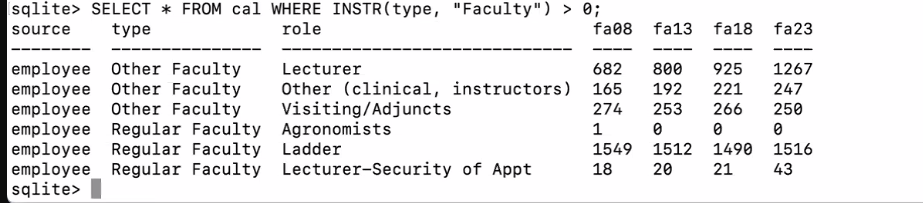

In [ ]:
SELECT type, SUM(fa23)-SUM(fa18) AS difference 
    FROM cal 
    WHERE source = "employee" 
    GROUP BY type 
    HAVING SUM(fa23) > SUM(fa18);

- HAVING may have aggregation functions. HAVING decides if a whole group gets to stay or go, WHERE is used to filter out individual rows.
- Ex1: What's the maximum difference between leg count for two animals with the same weight

In [ ]:
SELECT MAX(legs)-MIN(legs) AS difference FROM animals GROUP BY weight GROUP BY difference DESC LIMIT 1;


SELECT MAX(a.legs - b.legs) AS difference
    FROM animals AS a, animals AS b
    WHERE a.weight = b.weight;

- Ex2: What are all the kings of animals that have the maximal number of legs?
- Approach #1: Give the maximum number of legs a name

In [ ]:
CREATE TABLE m AS SELECT MAX(legs) AS max_legs from animals;
SELECT kind from animals, m WHERE legs = max_legs;

- Approache #2: For each kind of animal, compare its legs to the maxium legs by grouping

In [ ]:
SELECT a.kind FROM animals AS a, animals AS b GROUP BY a.kind HAVING a.legs = MAX(b.legs)